In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

In [26]:
digits = datasets.load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [27]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [28]:
digits.images.shape

(1797, 8, 8)

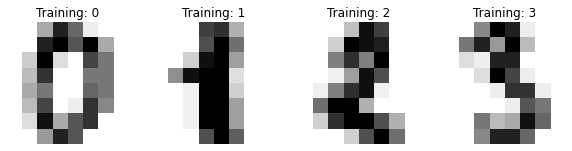

In [34]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

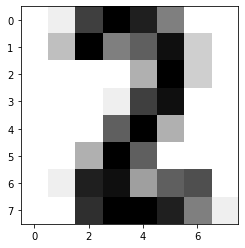

2


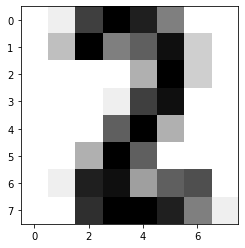

In [38]:
def show_digit(numy):
    print(digits.target[numy])
    plt.imshow(digits.images[numy],cmap='binary')
    plt.show()

## Convertimos las imagenes en arreglos unidimensionales


In [31]:
n_samples = len(digits.images)
flattened_images = digits.images.reshape((n_samples, -1))

In [32]:
print(flattened_images.shape)
print(flattened_images[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [33]:
y = digits.target
x = flattened_images

split = 1700
x_train = x[:split]
Y_train = y[:split]

x_test = x[split:]
Y_test = y[split:]

## equivalente

#X_train, X_test, y_train, y_test = train_test_split(flattened_images, digits.target,
#                                                    test_size=split/n_samples)


# Support Vector Machine


In [41]:


from sklearn import svm

svm_model = svm.SVC(gamma=0.001, C=100.)
svm_model.fit(x_train, Y_train)

svm_predict = svm_model.predict(x_test)

In [44]:
print(f"Classification report for classifier {svm_model}:\n"
      f"{classification_report(Y_test, svm_predict)}\n")



Classification report for classifier SVC(C=100.0, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        10
           5       0.90      1.00      0.95         9
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       0.91      1.00      0.95        10
           9       1.00      1.00      1.00         9

    accuracy                           0.98        97
   macro avg       0.98      0.98      0.98        97
weighted avg       0.98      0.98      0.98        97




# Arbol de decisión





In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'gini')
dt_model.fit(x_train, Y_train)

dt_predict = dt_model.predict(x_test)

print(f"Classification report for classifier {dt_model}:\n"
      f"{classification_report(Y_test, dt_predict)}\n")


Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.80      0.80        10
           2       0.89      0.80      0.84        10
           3       0.67      0.40      0.50        10
           4       0.83      1.00      0.91        10
           5       1.00      0.56      0.71         9
           6       0.77      1.00      0.87        10
           7       1.00      1.00      1.00        10
           8       0.69      0.90      0.78        10
           9       0.80      0.89      0.84         9

    accuracy                           0.84        97
   macro avg       0.85      0.83      0.83        97
weighted avg       0.84      0.84      0.83        97




# Con clasificador de arbol aleatorio

In [48]:

from sklearn.ensemble import RandomForestClassifier

rc_model = RandomForestClassifier(n_estimators = 150)
rc_model.fit(x_train, Y_train)

rc_predict = rc_model.predict(x_test)

print(f"Classification report for classifier {rc_model}:\n"
      f"{classification_report(Y_test, rc_predict)}\n")

Classification report for classifier RandomForestClassifier(n_estimators=150):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      0.70      0.82        10
           4       1.00      1.00      1.00        10
           5       0.82      1.00      0.90         9
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       0.90      0.90      0.90        10
           9       1.00      1.00      1.00         9

    accuracy                           0.96        97
   macro avg       0.96      0.96      0.96        97
weighted avg       0.96      0.96      0.96        97




In [49]:
print(accuracy_score(Y_test, rc_predict))

0.9587628865979382


# Con Red Neuronal

In [53]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
                hidden_layer_sizes=(15,), # 15 capas ocultas de Red Neuronal
                activation='logistic',
                alpha=1e-4,
                solver='sgd',
                tol=1e-4,
                random_state=1,
                learning_rate_init=.1,
                verbose=True)

mlp_model.fit(x_train, Y_train)

mlp_predict = mlp_model.predict(x_test)

print(f"Classification report for classifier {mlp_model}:\n"
      f"{classification_report(Y_test, mlp_predict)}\n")

Iteration 1, loss = 2.11696120
Iteration 2, loss = 1.59315175
Iteration 3, loss = 1.11243578
Iteration 4, loss = 0.75312112
Iteration 5, loss = 0.53314736
Iteration 6, loss = 0.39753838
Iteration 7, loss = 0.31506314
Iteration 8, loss = 0.25999020
Iteration 9, loss = 0.22759167
Iteration 10, loss = 0.20024342
Iteration 11, loss = 0.17550139
Iteration 12, loss = 0.15822439
Iteration 13, loss = 0.14266516
Iteration 14, loss = 0.13323783
Iteration 15, loss = 0.12635878
Iteration 16, loss = 0.11543863
Iteration 17, loss = 0.10873206
Iteration 18, loss = 0.10058183
Iteration 19, loss = 0.09619648
Iteration 20, loss = 0.09437513
Iteration 21, loss = 0.08853922
Iteration 22, loss = 0.08446977
Iteration 23, loss = 0.08050310
Iteration 24, loss = 0.07631371
Iteration 25, loss = 0.07409111
Iteration 26, loss = 0.07258852
Iteration 27, loss = 0.06901664
Iteration 28, loss = 0.06551617
Iteration 29, loss = 0.06390392
Iteration 30, loss = 0.06213605
Iteration 31, loss = 0.05949688
Iteration 32, los

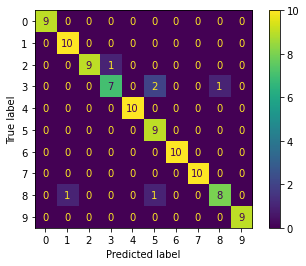

In [54]:
disp = plot_confusion_matrix(mlp_model, x_test, Y_test)